# Laburo con los datos experimentales

El objetivo de éste notebook es trabajar con los resultados experimentales (generados con `exp_k_alpha.py`). El código que genera los gráficos disponibles en el informe debería estar en su completitud aquí.

Primero que todo tenemos que cargar los datos experimentales:

In [1]:
from pickle import load
from gzip import open as zopen

with zopen('data.pickle.gz') as file:
    df = load(file)

df

,kind,k,alpha,elapsed_time,pca_init_and_fit_time,pca_transform_time,knn_init_and_fit_time,knn_predict_time,y_pred,y_test,y_fold_pred,y_fold_test
0,knnpca,1,1.0,5473120128,2.598776e+09,235056397.0,187226,2639100516,"[7.0, 0.0, 2.0, 2.0, 7.0, 1.0, 7.0, 2.0, 9.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[1.0, 4.0, 5.0, 1.0, 8.0, 7.0, 6.0, 7.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
1,knnpca,2,1.0,5575963044,2.598776e+09,235056397.0,146870,2741983788,"[1.0, 0.0, 2.0, 2.0, 7.0, 1.0, 3.0, 2.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[1.0, 4.0, 5.0, 1.0, 3.0, 7.0, 6.0, 4.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
2,knnpca,3,1.0,5737825042,2.598776e+09,235056397.0,185627,2903807029,"[1.0, 0.0, 2.0, 2.0, 7.0, 1.0, 3.0, 2.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[1.0, 6.0, 5.0, 1.0, 3.0, 3.0, 6.0, 4.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
3,knnpca,4,1.0,5679472451,2.598776e+09,235056397.0,232890,2845407175,"[1.0, 0.0, 2.0, 2.0, 7.0, 7.0, 3.0, 5.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[7.0, 6.0, 5.0, 1.0, 8.0, 3.0, 6.0, 4.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
4,knnpca,5,1.0,5718439245,2.598776e+09,235056397.0,205614,2884401245,"[1.0, 0.0, 2.0, 7.0, 7.0, 7.0, 5.0, 5.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[7.0, 6.0, 5.0, 1.0, 8.0, 3.0, 6.0, 4.0, 4.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,knn,26,NaN,716552634872,NaN,NaN,209053599,716343581273,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."
4646,knn,27,NaN,660746681464,NaN,NaN,238334395,660508347069,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."
4647,knn,28,NaN,604904267144,NaN,NaN,213043046,604691224098,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."
4648,knn,29,NaN,566102875095,NaN,NaN,200959077,565901916018,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."


Los datos contienen tanto información de corridas utilizando tano KNN+PCA (`kind == 'knnpca'`) cómo KNN a secas (`kind == 'knn'`) así que separémoslos.

In [2]:
df_knnpca = df[df['kind'] == 'knnpca']
df_knn = df[df['kind'] == 'knn']

print(f'Hay {len(df_knnpca)} corridas usando KNN + PCA')
print(f'Hay {len(df_knn)} corridas usando KNN a secas')

Hay 4500 corridas usando KNN + PCA
Hay 150 corridas usando KNN a secas


Hecho ésto, podemos empezar a explorar los datos usando las bibliotecas de python de siempre.

In [3]:
# Importemos todo :P
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### KNN

Los datos tienen toda la información de evaluación necesaria para evaluar diversas métricas. Podemos usar las implementaciones propias de scikit para trabajar con éstas.

In [4]:
from sklearn.metrics import accuracy_score

knn_accuracy_column = df_knn.apply(
    func=lambda row: accuracy_score(row['y_fold_test'], row['y_fold_pred']),
    axis=1
)
df_knn_accuracy = df_knn[['k']].copy()
df_knn_accuracy['accuracy'] = knn_accuracy_column
df_knn_accuracy

,k,accuracy
4500,1,0.964116
4501,2,0.956293
4502,3,0.962585
4503,4,0.959524
4504,5,0.960884
...,...,...
4645,26,0.943707
4646,27,0.942857
4647,28,0.942517
4648,29,0.942687


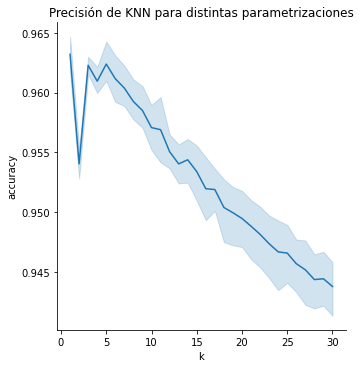

In [5]:
sns.relplot(data=df_knn_accuracy, x='k', y='accuracy', kind='line') \
   .set(title='Precisión de KNN para distintas parametrizaciones')

### KNN + PCA

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo total')

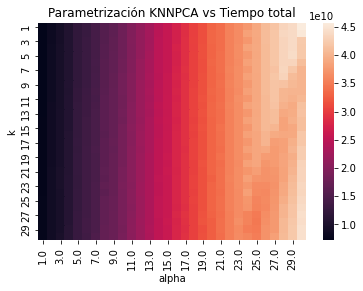

In [6]:
tiempos_totales = df_knnpca.pivot_table(index='k', columns='alpha', values='elapsed_time', aggfunc=np.mean)
sns.heatmap(tiempos_totales).set_title('Parametrización KNNPCA vs Tiempo total')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

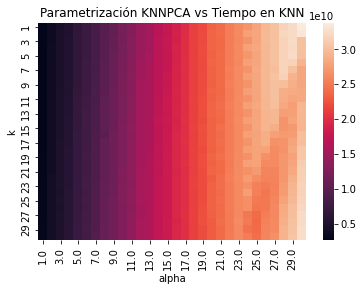

In [7]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='knn_predict_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

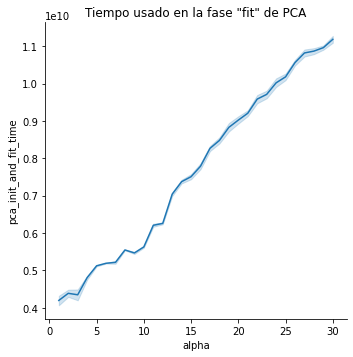

In [8]:
sns.relplot(data=df_knnpca, x='alpha', y='pca_init_and_fit_time', kind='line') \
   .set(title='Tiempo usado en la fase "fit" de PCA')

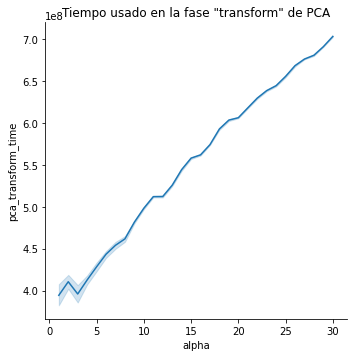

In [9]:
sns.relplot(data=df_knnpca, x='alpha', y='pca_transform_time', kind='line') \
   .set(title='Tiempo usado en la fase "transform" de PCA')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

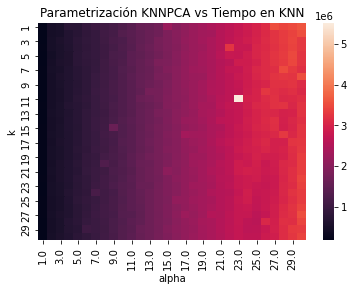

In [10]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='knn_init_and_fit_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

In [11]:
df_knnpca

df_knnpca_accuracy_column = df_knnpca.apply(
    func=lambda row: accuracy_score(row['y_fold_test'], row['y_fold_pred']),
    axis=1
)
df_knnpca_accuracy = df_knnpca[['k']].copy()
df_knnpca_accuracy['alpha'] = df_knnpca['alpha']
df_knnpca_accuracy['accuracy'] = df_knnpca_accuracy_column

df_knnpca_accuracy.head(20)

,k,alpha,accuracy
0,1,1.0,0.239286
1,2,1.0,0.261565
2,3,1.0,0.265646
3,4,1.0,0.270578
4,5,1.0,0.270238
5,6,1.0,0.272279
6,7,1.0,0.273810
7,8,1.0,0.271429
8,9,1.0,0.272959
9,10,1.0,0.273639


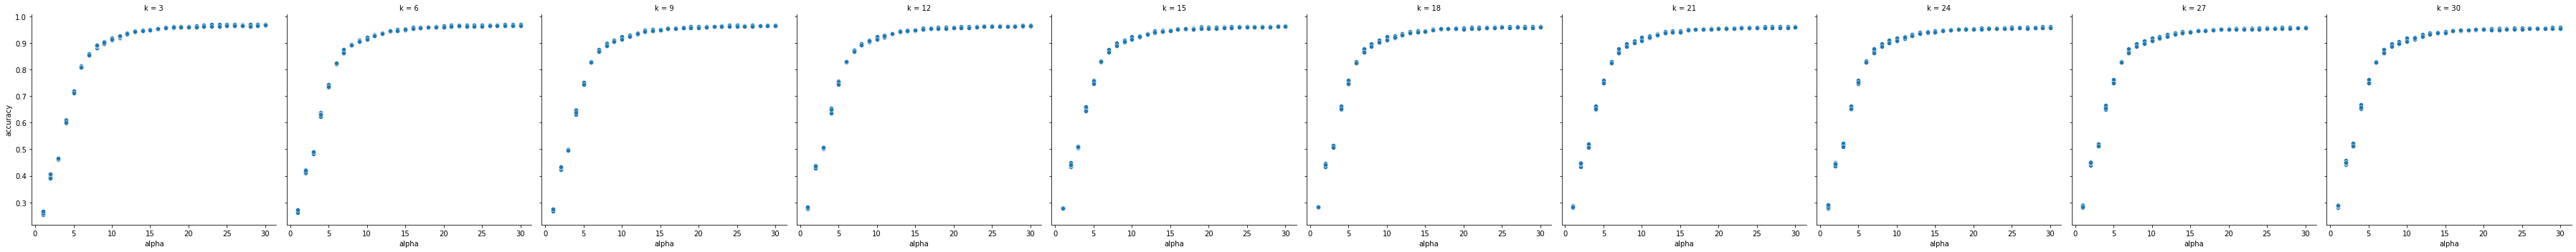

In [12]:
sns.relplot(x="alpha", y="accuracy", col="k", aspect=1, data=df_knnpca_accuracy.query("k%3 == 0"))

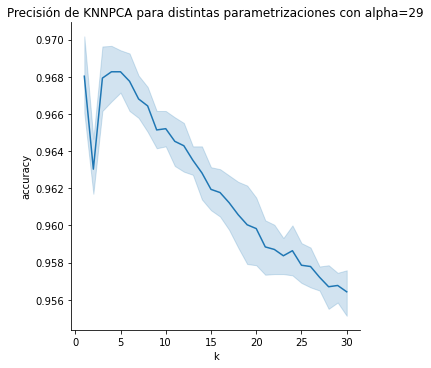

In [13]:
data = df_knnpca_accuracy[df_knnpca_accuracy['alpha'] == 29]

sns.relplot(data=data, x='k', y='accuracy', kind='line') \
   .set(title='Precisión de KNNPCA para distintas parametrizaciones con alpha=29')

In [14]:
max_knnpca_i = df_knnpca_accuracy['accuracy'].argmax()
max_knnpca_row = df_knnpca.iloc[max_knnpca_i]

max_knn_i = df_knn_accuracy['accuracy'].argmax()
max_knn_row = df_knn.iloc[max_knn_i]

In [15]:
print(df_knnpca_accuracy.iloc[max_knnpca_i])
print(df_knn_accuracy.iloc[max_knn_i])


k            1.000000
alpha       30.000000
accuracy     0.972279
Name: 1170, dtype: float64
k           5.000000
accuracy    0.965816
Name: 4534, dtype: float64


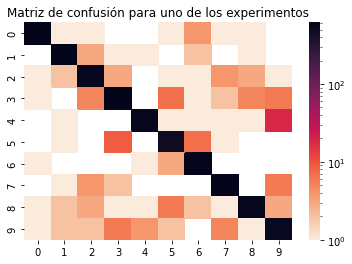

In [16]:
from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(max_knnpca_row['y_fold_test'], max_knnpca_row['y_fold_pred'])

cmap = sns.cm.rocket_r
confusion_heatmap = sns.heatmap(confusion, norm=LogNorm(), cmap=cmap) \
                       .set(title='Matriz de confusión para uno de los experimentos')

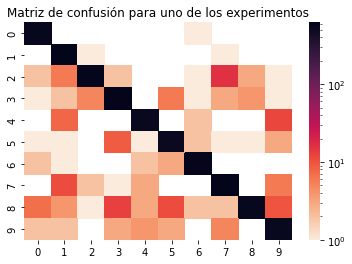

In [17]:
confusion = confusion_matrix(max_knn_row['y_fold_test'], max_knn_row['y_fold_pred'])

cmap = sns.cm.rocket_r
confusion_heatmap = sns.heatmap(confusion, norm=LogNorm(), cmap=cmap) \
                       .set(title='Matriz de confusión para uno de los experimentos')

In [18]:
from sklearn.metrics import cohen_kappa_score

# min_knnpca_i = df_knnpca_accuracy['accuracy'].argmin()
random_knnpca_row = df_knnpca.iloc[100]

cohen_kappa_score(max_knnpca_row['y_pred'], random_knnpca_row['y_pred'])

0.605606482898932

# Mejoras posibles a kNN

kNN puede usar otras estructuras de datos para acelerar el tiempo que tardamos en evaluar nuestros modelos. En éste caso utilizaremos la implementación de kNN de la biblioteca `sklearn` en lugar de la nuestra (de esta manera esperamos que las diferencias de tiempo recaigan en la elección de estructuras en lugar de en nuestras capacidades cómo programadores).

Para ésta parte de la experimentación compararemos los tiempos de los modelos utilizando búsqueda exhaustiva (igual que en nuestra implementación) y árboles k-dimensionales.

In [19]:
# Vamos a necesitar algunos datos
data = pd.read_csv('../data/train.csv')
data_X = data[data.columns[1:]].values
data_y = data["label"].values.reshape(-1, 1)

# Separémoslos sencillamente en un conjunto de entrenamiento y uno de evaluación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.4)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Veamos la documentación oficial:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
     

In [109]:
from time import perf_counter_ns
from metnum import PCA

y_train_1d = y_train.ravel()

ALPHA_RANGE = range(5, 201, 5)
NUM_TRIES = 5
LOAD_FROM_FILE = True

def time_for(fn, *args, **kwargs):
    start_time = perf_counter_ns()
    fn(*args, **kwargs)
    end_time = perf_counter_ns()
    return end_time - start_time

if LOAD_FROM_FILE:
    with open('kd_tree_vs_brute.pickle', 'rb') as file:
        results = load(file)
else:
    results_kd_tree = {}
    results_brute = {}
    results = {
        'kd_tree': results_kd_tree,
        'brute': results_brute
    }

    for alpha in ALPHA_RANGE:
        # Primero achiquemos la dimensionalidad del problema así no tarda mil años
        pca = PCA(alpha)
        pca.fit(X_train)
        X_train_pc = pca.transform(X_train)
        X_test_pc = pca.transform(X_test)

        results_for_this_alpha_kd_tree = results_kd_tree.setdefault(alpha, [])
        results_for_this_alpha_brute = results_brute.setdefault(alpha, [])

        # Ok, queremos comparar algorithm='kd_tree' con algorithm='brute'
        knn_kd_tree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
        knn_kd_tree.fit(X_train_pc, y_train_1d)
        knn_brute = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
        knn_brute.fit(X_train_pc, y_train_1d)

        for _ in range(NUM_TRIES):
            results_for_this_alpha_kd_tree.append(time_for(knn_kd_tree.predict, X_test_pc))
            results_for_this_alpha_brute.append(time_for(knn_brute.predict, X_test_pc))

    with open('kd_tree_vs_brute.pickle', 'wb') as file:
        from pickle import dump
        dump(results, file)

results

{'kd_tree': {5: [455152280, 459383158, 467577604, 452955363, 447630082],
  10: [1308453825, 1307280325, 1316089108, 1309203032, 1311228830],
  15: [2678360287, 2673716399, 2675803381, 2681976173, 2674609984],
  20: [4385636662, 4400180266, 4379084861, 4380687846, 4558267683],
  25: [6194987025, 6227721672, 6234120837, 6249245237, 6254331689],
  30: [9375174167, 9364357677, 9334310750, 9394704089, 9404532546],
  35: [13664373509, 13675770105, 13705467308, 13740325408, 13663892680],
  40: [17545963352, 17496832944, 17464896190, 17469898155, 17373464377],
  45: [20651712155, 20612014609, 20604753852, 20596447049, 20623701698],
  50: [23582964318, 23581115162, 23754394044, 23739000574, 23754697288],
  55: [27211321907, 27214417069, 27189140548, 27147203167, 27199911106],
  60: [30168368702, 30169764479, 30150780271, 30199039365, 30089292372],
  65: [33651186913, 33612283263, 33606800757, 33629868073, 33626028943],
  70: [36285844115, 36240493505, 36260802899, 36306008132, 36279420946],
  7

In [110]:
df_results = pd.DataFrame(((algo, alpha, time)
                           for algo, alpha_dict in results.items()
                           for alpha, timing_list in alpha_dict.items()
                           for time in timing_list),
                          columns=['Algoritmo', 'alpha', 'Tiempo (en segundos)'])
df_results['Tiempo (en segundos)'] /= 10**9 # Pasamos de nanosegundos a segundos
df_results

,Algoritmo,alpha,Tiempo (en segundos)
0,kd_tree,5,0.455152
1,kd_tree,5,0.459383
2,kd_tree,5,0.467578
3,kd_tree,5,0.452955
4,kd_tree,5,0.447630
...,...,...,...
395,brute,200,8.706522
396,brute,200,8.771624
397,brute,200,8.757737
398,brute,200,8.821027


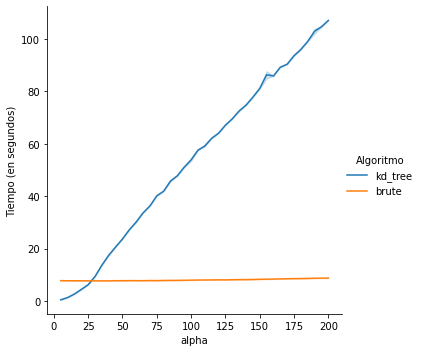

In [111]:
grid = sns.relplot(data=df_results, x='alpha', y='Tiempo (en segundos)', hue='Algoritmo', kind='line')
grid.figure.savefig('sklearn-kd-tree-vs-brute.pdf')

Ahora comparemos nuestro `brute` con el de `sklearn` :)

In [105]:
from metnum import KNNClassifier

LOAD_FROM_FILE = True

if LOAD_FROM_FILE:
    with open('kd_tree_vs_ours.pickle', 'rb') as file:
        results = load(file)
else:
    results_sklearn_vs_ours = []

    for alpha in range(5, 51, 5):
        print(f'alpha={alpha} ', flush=True)
        # Primero achiquemos la dimensionalidad del problema así no tarda mil años
        pca = PCA(alpha)
        pca.fit(X_train)
        X_train_pc = pca.transform(X_train)
        X_test_pc = pca.transform(X_test)

        knn_ours = KNNClassifier(5)
        knn_ours.fit(X_train_pc, y_train_1d)
        knn_sklearn = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
        knn_sklearn.fit(X_train_pc, y_train_1d)

        for _ in range(NUM_TRIES):
            print('.', end='', flush=True)
            results_sklearn_vs_ours.append(('ours', alpha, time_for(knn_ours.predict, X_test_pc)))
            print(',', end='', flush=True)
            results_sklearn_vs_ours.append(('sklearn', alpha, time_for(knn_sklearn.predict, X_test_pc)))

    results_sklearn_vs_ours = pd.DataFrame(results_sklearn_vs_ours, columns=['Implementación', 'alpha', 'Tiempo (en segundos)'])
    results_sklearn_vs_ours['Tiempo (en segundos)'] /= 10**9

    with open('kd_tree_vs_ours.pickle', 'wb') as file:
        from pickle import dump
        dump(results_sklearn_vs_ours, file)

results_sklearn_vs_ours

alpha=5 
.,.,.,.,.,alpha=10 
.,.,.,.,.,alpha=15 
.,.,.,.,.,alpha=20 
.,.,.,.,.,alpha=25 
.,.,.,.,.,alpha=30 
.,.,.,.,.,alpha=35 
.,.,.,.,.,alpha=40 
.,.,.,.,.,alpha=45 
.,.,.,.,.,alpha=50 
.,.,.,.,.,

,Implementación,alpha,Tiempo (en segundos)
0,ours,5,2.770753
1,sklearn,5,7.861581
2,ours,5,2.770436
3,sklearn,5,7.721038
4,ours,5,2.766620
...,...,...,...
95,sklearn,50,7.665190
96,ours,50,18.684645
97,sklearn,50,7.658959
98,ours,50,18.667993


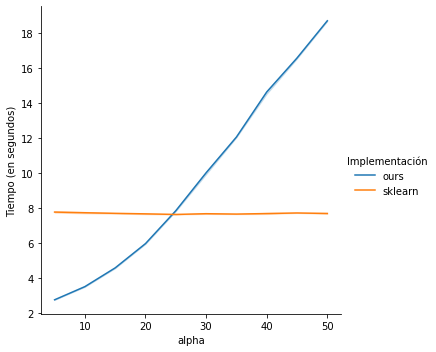

In [106]:
grid = sns.relplot(data=results_sklearn_vs_ours, x='alpha', y='Tiempo (en segundos)', hue='Implementación', kind='line')
grid.figure.savefig('brute-sklearn-vs-own.pdf')

Finalmente, veamos cómo se comporta nuestra implementación al variar $k$ y $\alpha$

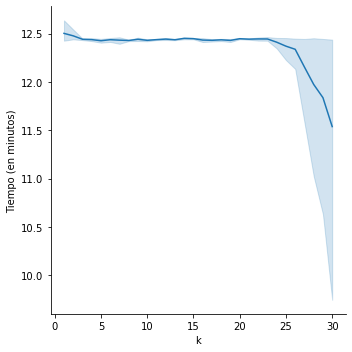

In [107]:
data = df_knn[['k', 'knn_predict_time']].copy()
data['knn_predict_time'] /= 10**9 * 60
data.columns = ['k', 'Tiempo (en minutos)']
sns.relplot(data=data, x='k', y='Tiempo (en minutos)', kind='line') \
   .figure.savefig('knn-k-performance.pdf')

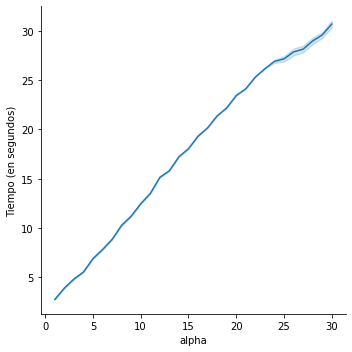

In [108]:
data = df_knnpca[['alpha', 'knn_predict_time']].copy()
data['knn_predict_time'] /= 10**9
data.columns = ['alpha', 'Tiempo (en segundos)']
sns.relplot(data=data, x='alpha', y='Tiempo (en segundos)', kind='line') \
   .figure.savefig('knnpca-alpha-performance.pdf')